#Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataser

In [2]:
dataset = pd.read_csv("car_sales_data.csv")

In [3]:
# List of first five Row
dataset.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


In [4]:
# List of Last five Row
dataset.tail()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
2499995,2022-05-26,Isabella Moore,Shirley Lee,Chevrolet,Silverado,2021,49823,0.062977,3137.70
2499996,2022-10-03,Kimberly Snow,Tara Rodgers,Ford,F-150,2022,18803,0.068339,1284.97
2499997,2022-06-07,Jessica Young,Jennifer Moore,Chevrolet,Civic,2010,30863,0.088915,2744.19
2499998,2023-02-15,Donald Barber,Ashley Diaz,Honda,Silverado,2014,26125,0.088260,2305.80
2499999,2023-03-24,Kayla Fowler,Nathan Thompson,Honda,Civic,2010,20762,0.137105,2846.57


In [5]:
dataset.shape

(2500000, 9)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   Salesperson        object 
 2   Customer Name      object 
 3   Car Make           object 
 4   Car Model          object 
 5   Car Year           int64  
 6   Sale Price         int64  
 7   Commission Rate    float64
 8   Commission Earned  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 171.7+ MB


In [7]:
dataset['Date'] = pd.to_datetime(dataset['Date'], errors = 'coerce')
dataset['Car Year'] = pd.to_numeric(dataset['Car Year'], errors='coerce')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   Salesperson        object        
 2   Customer Name      object        
 3   Car Make           object        
 4   Car Model          object        
 5   Car Year           int64         
 6   Sale Price         int64         
 7   Commission Rate    float64       
 8   Commission Earned  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 171.7+ MB


In [9]:
dataset.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


In [10]:
dataset.describe()

,Date,Car Year,Sale Price,Commission Rate,Commission Earned
count,2500000,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,2022-10-30 10:01:32.632321024,2.015996e+03,3.001218e+04,9.998766e-02,3.001005e+03
min,2022-05-01 00:00:00,2.010000e+03,1.000000e+04,5.000014e-02,5.013400e+02
25%,2022-07-31 00:00:00,2.013000e+03,2.001900e+04,7.496450e-02,1.821710e+03
50%,2022-10-30 00:00:00,2.016000e+03,3.000600e+04,1.000058e-01,2.741910e+03
75%,2023-01-30 00:00:00,2.019000e+03,4.002200e+04,1.250065e-01,3.978142e+03
max,2023-05-01 00:00:00,2.022000e+03,5.000000e+04,1.500000e-01,7.494530e+03
std,NaN,3.739132e+00,1.154514e+04,2.887202e-02,1.481467e+03


In [11]:
dataset.nunique()

Date                     366
Salesperson           518657
Customer Name         518251
Car Make                   5
Car Model                  5
Car Year                  13
Sale Price             40001
Commission Rate      2500000
Commission Earned     586911
dtype: int64

In [12]:
# check the missing value
dataset.isnull().sum()

Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64

<Axes: title={'center': 'Year wise Model'}, xlabel='Car Year'>

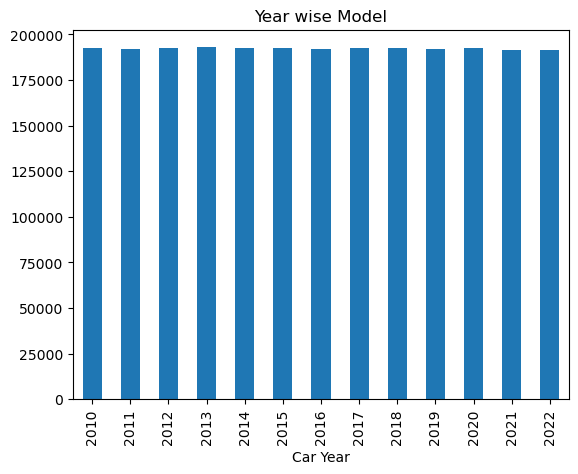

In [13]:
dataset.groupby('Car Year') ['Car Make'].count().plot(kind ='bar', title = 'Year wise Model')

# inference - From the bar chat we can see that all year had the  car make equle .

Text(0.5, 1.0, 'Total sale by Year')

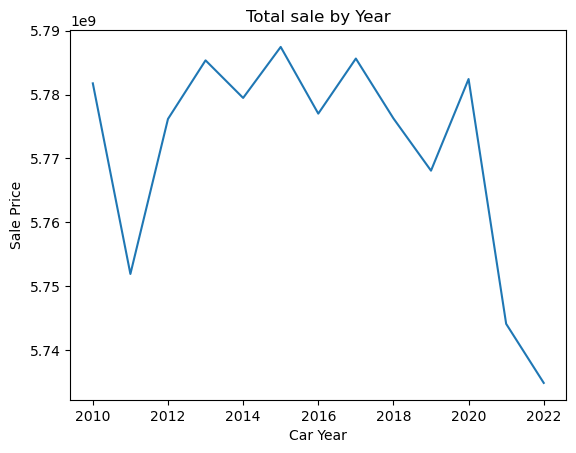

In [14]:
Total_by_year = dataset.groupby('Car Year') ['Sale Price'] .sum()
plt.plot(Total_by_year.index, Total_by_year.values, )
plt.xlabel('Car Year')
plt.ylabel('Sale Price')
plt.title('Total sale by Year')


# inference - From the graph just plot we can see that year 2015 had the best sale by amount out of all year.

In [15]:
dataset.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


<Axes: title={'center': 'Model wise Car make'}, xlabel='Car Make'>

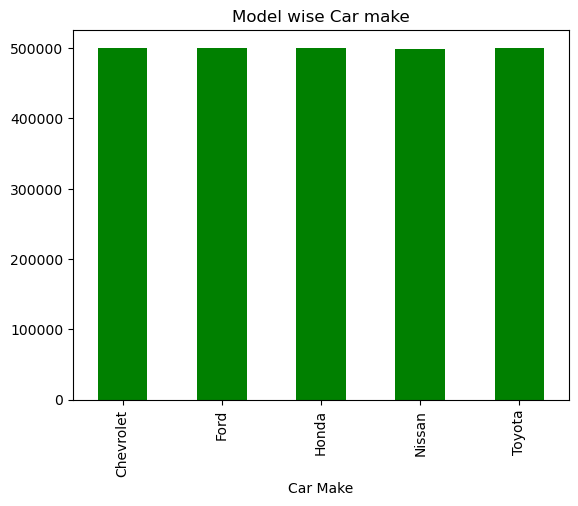

In [16]:
dataset.groupby('Car Make') ['Car Model'].count() .plot(kind = 'bar', color = 'green', title = 'Model wise Car make')

# Inference - From the bar chat we can see that all model car make the Equle

<Axes: title={'center': 'Top 3 sale Model'}, xlabel='Car Model'>

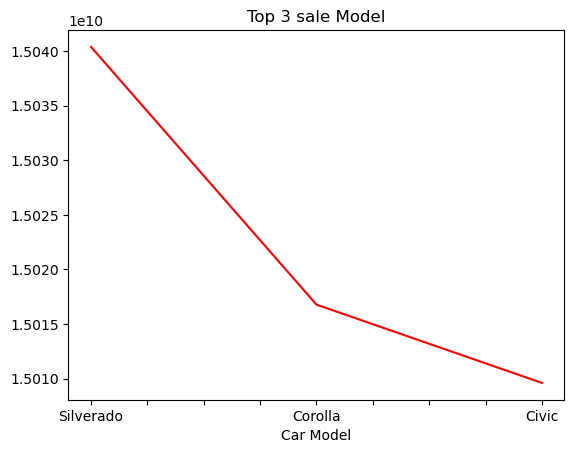

In [17]:
# Top 3 Model that sale the most 
dataset.groupby('Car Model') ['Sale Price'].sum() .sort_values(ascending = False) .head(3).plot(kind = 'line', color = 'red', title = 'Top 3 sale Model')

# Inference -  From the bar chart we can see that Silverado, Corolla, Civic Model sale the highest.

<Axes: title={'center': 'Top Five Year Sale'}, ylabel='Sale Price'>

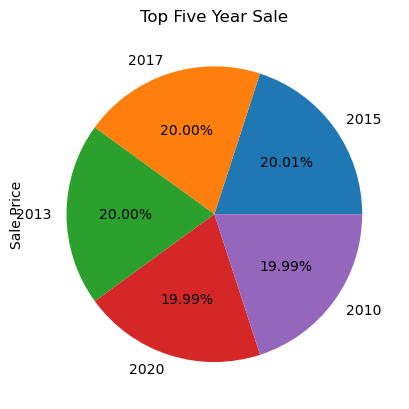

In [18]:
# Top 5 Year best sale persantage
dataset.groupby('Car Year') ['Sale Price'] .sum() .sort_values(ascending = False) .head(5).plot(kind = 'pie', autopct = '%1.2f%%', title = 'Top Five Year Sale')

# Inference = Frome The Pie Chart we can see that 2015, 2013, 2017, 2010, 2020 Year Sale the highest

<Axes: title={'center': 'Year wise commission'}, xlabel='Car Year'>

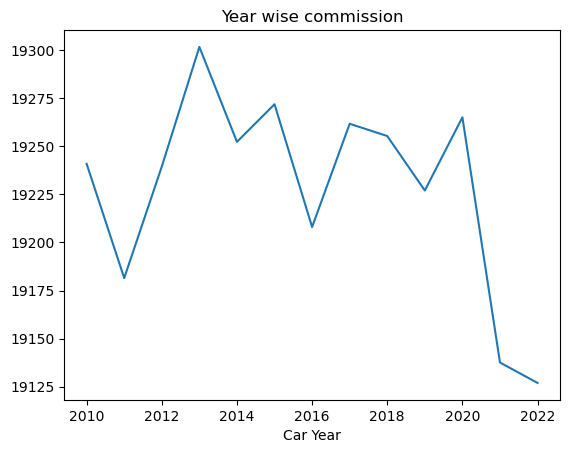

In [19]:
dataset.groupby('Car Year') ['Commission Rate'] .sum().plot(kind = 'line', title = 'Year wise commission')

# Inference - We can see that year 2013 had the best commission

<Axes: title={'center': 'Model Wise Commission Earned'}, xlabel='Car Model'>

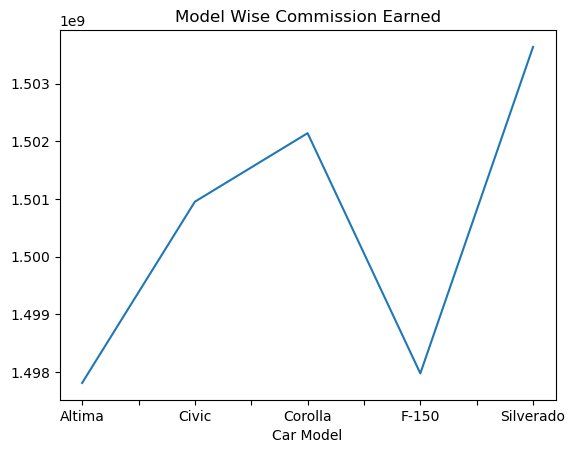

In [21]:
# Model Wise commission Earned
dataset.groupby('Car Model') ['Commission Earned'] .sum().plot(kind = 'line', title = 'Model Wise Commission Earned')

In [22]:
# Add month colomn 
dataset['Month'] = pd.DatetimeIndex(dataset['Date']).month
month_label = {1.0 : 'Jan', 2.0 : 'Feb', 3.0 : 'Mar', 4.0 : 'Apr',
               5.0 : 'May', 6.0 : 'Jun', 7.0 : 'July', 8.0 : 'Aug',
               9.0 : 'Sep', 10.0 : 'Oct', 11.0 : 'Nov', 12.0 : 'Dec'}
dataset['Month'] = dataset.Month.map(month_label)
mon = dataset.Month.value_counts(sort = False)

In [23]:
dataset.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,Month
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73,Aug
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40,Mar
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63,Apr
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20,Sep
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85,Jun


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'value count')]

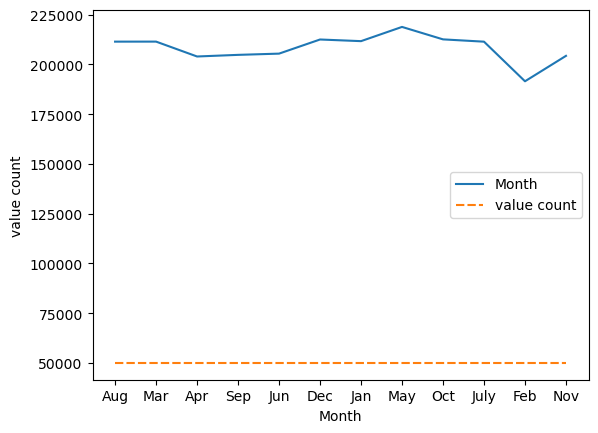

In [30]:
df = pd.DataFrame({
    "Month": mon.values,
    "value count" : dataset.groupby("Month", sort = False) ['Sale Price'].max()
})
p = sns.lineplot(data = df)
p.set(xlabel = 'Month', ylabel= 'value count')

# Inference - We can see that Frome the line plot that month sale around 218000 and  all month maximum sale is 50000.

<Axes: title={'center': 'Monthly Commission Earned'}, xlabel='Month'>

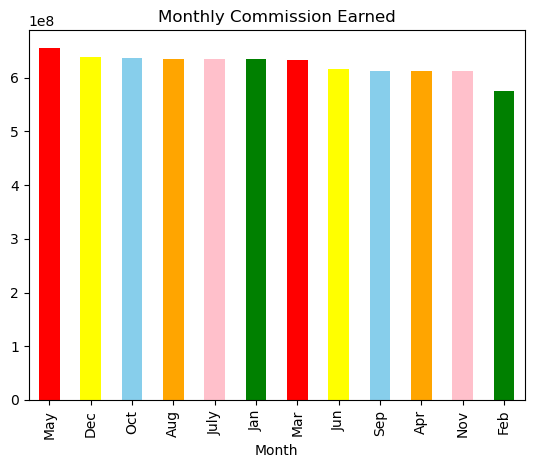

In [44]:
colors = ['red', 'yellow', 'skyblue', 'orange','pink', 'green']
dataset.groupby('Month') ['Commission Earned'] .sum().sort_values(ascending = False).plot(kind = 'bar', color = colors, title = 'Monthly Commission Earned')

# Inference - We can see that maximum commission earn in May month.